In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
cash_request = pd.read_csv('./project-1-ironhack-payments-es/project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('./project-1-ironhack-payments-es/project_dataset/extract - fees - data analyst - .csv')

## Tratamiento del dataframe 'cash_request'

In [75]:
cash_request.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                           0
moderated_at                   7758
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     6276
money_back_date                6026
transfer_type                     0
send_at                        6325
recovery_status               18727
reco_creation                 18727
reco_last_update              18727
mes_cohorte                       0
dtype: int64

In [57]:
cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [58]:
cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [59]:
cash_request.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,23970.0,13910.966124,7788.117214,3.0,7427.25,14270.5,20607.75,27010.0
amount,23970.0,82.720818,26.528065,1.0,50.00,100.0,100.00,200.0
user_id,21867.0,32581.250789,27618.565773,34.0,10804.00,23773.0,46965.00,103719.0
deleted_account_id,2104.0,9658.755228,7972.743249,91.0,3767.00,6121.5,16345.00,30445.0


#### Estadistica descriptiva del dataset cash_request

El dataframe cash_request muestra informacion sobre extraqcion de dinero de diferentes clientes

Variable objetivo:
* cohortes: variable a crear basada en el mes de la primera transacción

Variables cuantitativas o numericas:
* todas estas variables son fechas:
  * amount: Numerica, cuantitativa, de razon
  * created_at: continua, de intervalo
  * updated_at: continua, de intervalo
  * moderated_at: continua, de intervalo
  * reimbursment_date: continua, de intervalo
  * cash_request_received_date: continua, de intervalo
  * money_back_date: continua, de intervalo
  * send_at: continua, de intervalo
  * reco_creation: continua, de intervalo
  * reco_last_update: continua, de intervalo

Variables cualitativas o categoricas:
* id: politomica, nominal
* status: dicotomica, nominal
* user_id: politomica, nominal
* deleted_account_id: politomica, nominal
* transfer_type: dicotomica, nominal
* recovery_status: politomica, nominal

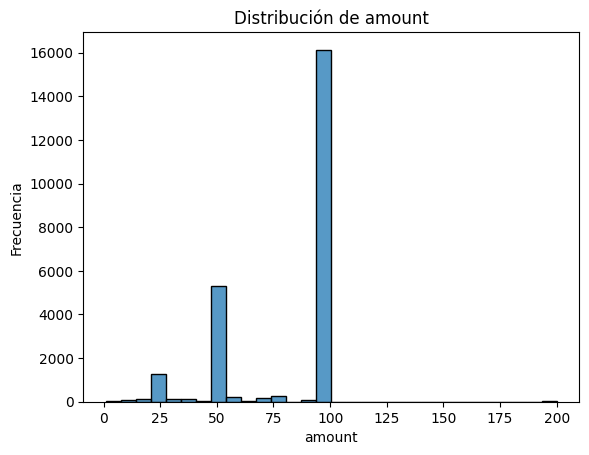

In [60]:
sns.histplot(cash_request['amount'], bins=30)
plt.title('Distribución de amount')
plt.xlabel('amount')
plt.ylabel('Frecuencia')
plt.show()

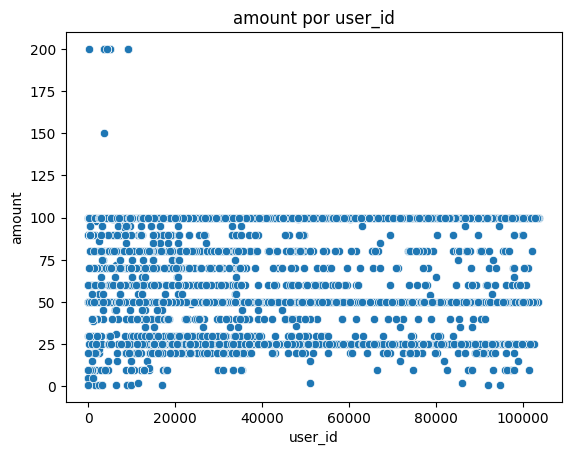

In [61]:
sns.scatterplot(x='user_id', y='amount', data=cash_request)
plt.title('amount por user_id')
plt.xlabel('user_id')
plt.ylabel('amount')
plt.show()

**0. Creación de las cohortes por mes:** Basasdo en el mes de creación de la primera transacción (created_at)

In [62]:
cash_request['created_at'] = pd.to_datetime(cash_request['created_at']) # Convertir la columna created_at a formato datetime
cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  object             
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  object             
 10  money_back_date             16543 non-null  object        

In [74]:
cash_request['mes_cohorte'] = cash_request['created_at'].dt.to_period('M')  # Crear de una nueva columna 'mes_cohorte' con el mes de la columna 'created_at'
cash_request.head()

C:\Users\polka\AppData\Local\Temp\ipykernel_34644\1976175423.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request['mes_cohorte'] = cash_request['created_at'].dt.to_period('M')  # Crear de una nueva columna 'mes_cohorte' con el mes de la columna 'created_at'


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,mes_cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05


**1. Frecuencia de Uso del Servicio:** Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.

In [119]:
cohortes_count = cash_request.groupby(by='mes_cohorte').agg({ # Agrupamos la columna mes_cohorte y aplicamos la función 'agg' para agregar diferentes metricas
  'id': 'count', # Cada transacción tiene un id único, le hacemos el count para sumar cada 'id' unica y así saber el numero de transacciones de cada cohorte
  })
cohortes_count

,id
mes_cohorte,
2019-11,1
2019-12,230
2020-01,176
2020-02,157
2020-03,207
2020-04,418
2020-05,727
2020-06,2251
2020-07,3159


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2019-11'),
  Text(1, 0, '2019-12'),
  Text(2, 0, '2020-01'),
  Text(3, 0, '2020-02'),
  Text(4, 0, '2020-03'),
  Text(5, 0, '2020-04'),
  Text(6, 0, '2020-05'),
  Text(7, 0, '2020-06'),
  Text(8, 0, '2020-07'),
  Text(9, 0, '2020-08'),
  Text(10, 0, '2020-09'),
  Text(11, 0, '2020-10'),
  Text(12, 0, '2020-11')])

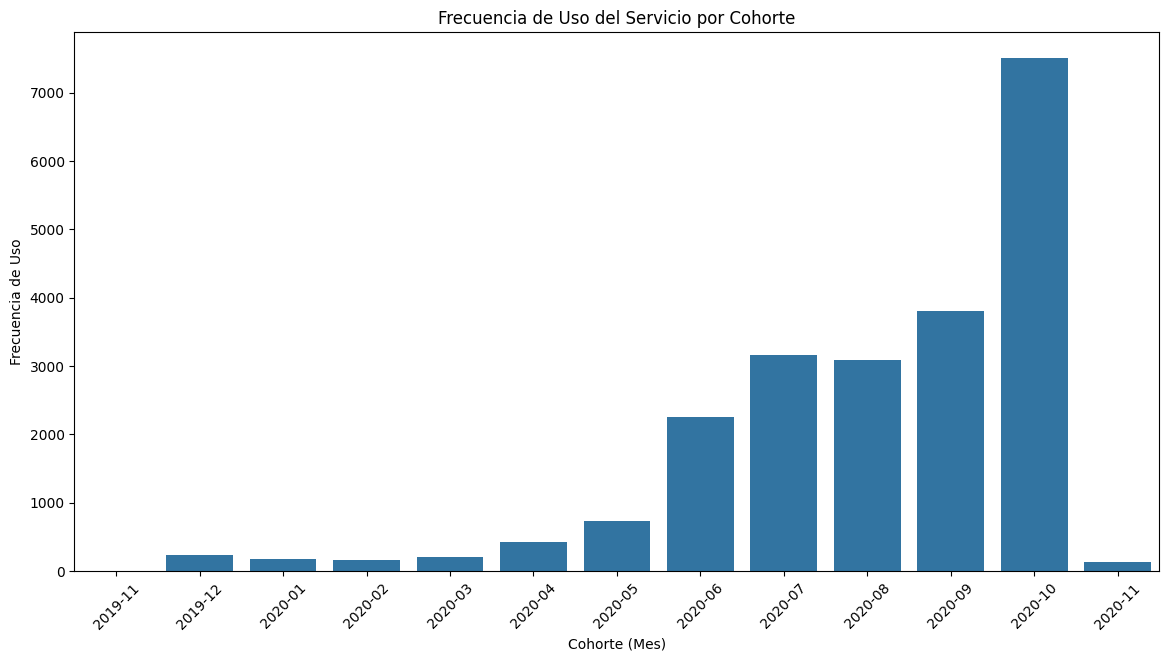

In [120]:
plt.figure(figsize=(14, 7))

sns.barplot(x='mes_cohorte', y='id', data=cohortes_count)
plt.title('Frecuencia de Uso del Servicio por Cohorte')
plt.xlabel('Cohorte (Mes)')
plt.ylabel('Frecuencia de Uso')
plt.xticks(rotation=45)

Desde el inicio del servicio se observa un aumento de la frequencia del uso progresiva, hasta la cohorte del 10-2020 que, muestra una frequencia mucho mas elevada que el resto. Y luego la del 11-2020 vuelve a niveles muy bajos.

**2. Tasa de Incidentes:** Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.

In [97]:
cash_request['status'].unique()

array(['rejected', 'money_back', 'active', 'direct_debit_rejected',
       'transaction_declined', 'direct_debit_sent', 'canceled'],
      dtype=object)

Entendemos que los incidentes de pago son los valores 'rejected' de la columna 'status'
* Calcular el numero de 'rejected' en la columna 'status'
* El total de transacciones lo tenemos del punto anterior
* Calcular el porcentaje de 'rejected' sobre el total

In [111]:
incidentes = cash_request[cash_request['status'] == 'rejected'] # Guardamos las filas del dataframe donde el 'status' == 'rejected' en un nuevo dataframe llamado 'incidentes'
incidentes

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,mes_cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9069,26105,50.0,rejected,2020-10-29 13:35:47.978382+00:00,2020-10-29 16:39:07.183632+00,27786.0,2020-10-29 16:39:07.176473+00,NaN,2020-12-01 11:00:00+00,NaN,NaN,instant,2020-10-29 13:35:55.72518+00,NaN,NaN,NaN,2020-10
9110,26191,100.0,rejected,2020-10-29 19:09:28.473063+00:00,2020-10-30 09:29:36.421762+00,3045.0,2020-10-30 09:29:36.414627+00,NaN,2020-11-30 23:00:00+00,NaN,NaN,instant,2020-10-29 19:09:55.08942+00,NaN,NaN,NaN,2020-10
9149,26245,50.0,rejected,2020-10-30 00:56:03.517376+00:00,2020-10-30 09:33:07.630664+00,80851.0,2020-10-30 09:33:07.621685+00,NaN,2020-11-18 23:51:00+00,NaN,NaN,instant,2020-10-30 00:56:13.671199+00,NaN,NaN,NaN,2020-10
9150,26252,50.0,rejected,2020-10-30 05:17:10.279828+00:00,2020-10-30 09:36:34.134492+00,3287.0,2020-10-30 09:36:34.12726+00,NaN,2020-11-26 23:00:00+00,NaN,NaN,instant,2020-10-30 05:17:23.723631+00,NaN,NaN,NaN,2020-10


In [116]:
incidentes_status = incidentes.groupby(by='mes_cohorte').agg({
  'id': 'count'
})
print(f"df incidentes:\n{incidentes_status}")
print(f"df cohortes_status:\n{cohortes_status}")

df incidentes:
               id
mes_cohorte      
2019-12        79
2020-01        83
2020-02        51
2020-03        55
2020-04       120
2020-05       167
2020-06       746
2020-07      1273
2020-08      1148
2020-09      1116
2020-10       380
2020-11         3
df cohortes_status:
             frequencia
mes_cohorte            
2019-11               1
2019-12             230
2020-01             176
2020-02             157
2020-03             207
2020-04             418
2020-05             727
2020-06            2251
2020-07            3159
2020-08            3090
2020-09            3802
2020-10            7512
2020-11             137


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2019-11'),
  Text(1, 0, '2019-12'),
  Text(2, 0, '2020-01'),
  Text(3, 0, '2020-02'),
  Text(4, 0, '2020-03'),
  Text(5, 0, '2020-04'),
  Text(6, 0, '2020-05'),
  Text(7, 0, '2020-06'),
  Text(8, 0, '2020-07'),
  Text(9, 0, '2020-08'),
  Text(10, 0, '2020-09'),
  Text(11, 0, '2020-10'),
  Text(12, 0, '2020-11')])

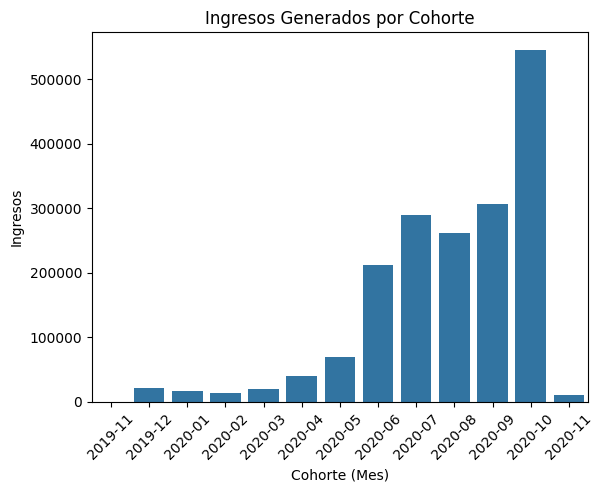

In [90]:
sns.barplot(x='mes_cohorte', y='amount', data=cohortes)
plt.title('Ingresos Generados por Cohorte')
plt.xlabel('Cohorte (Mes)')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)

In [68]:
cash_request.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
mes_cohorte                       0
dtype: int64

In [69]:
# Quitar los valores NaN de 'user_id' a la brava
cash_request = cash_request.dropna(subset=['user_id'])
cash_request.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                           0
moderated_at                   7758
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     6276
money_back_date                6026
transfer_type                     0
send_at                        6325
recovery_status               18727
reco_creation                 18727
reco_last_update              18727
mes_cohorte                       0
dtype: int64

In [70]:
cash_request['created_at']

0       2019-12-10 19:05:21.596873+00:00
1       2019-12-10 19:50:12.347780+00:00
2       2019-12-10 19:13:35.825460+00:00
3       2019-12-10 19:16:10.880172+00:00
4       2020-05-06 09:59:38.877376+00:00
                      ...               
23964   2020-09-19 07:37:14.351567+00:00
23965   2020-10-12 13:54:11.686225+00:00
23967   2020-10-20 07:58:04.006937+00:00
23968   2020-10-10 05:40:55.700422+00:00
23969   2020-10-08 14:16:52.155661+00:00
Name: created_at, Length: 21867, dtype: datetime64[ns, UTC]

In [71]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [72]:
fees.info()
fees['charge_moment'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


array(['after', 'before'], dtype=object)

In [73]:
fees.describe()

,id,cash_request_id,total_amount
count,21061.000000,21057.000000,21061.000000
mean,10645.355111,16318.449162,5.000237
std,6099.315256,6656.149949,0.034453
min,1.000000,1456.000000,5.000000
25%,5385.000000,11745.000000,5.000000
50%,10652.000000,17160.000000,5.000000
75%,15925.000000,21796.000000,5.000000
max,21193.000000,27010.000000,10.000000


#### Estadistica descriptiva del dataset fees

El dataframe fees muestra informacion sobre extraqcion de dinero de diferentes clientes

Variable objetivo:
* total_amount: Numerica, cuantitativa, de razon

Variables cuantitativas o numericas:
* todas estas variables son fechas:
  * created_at: continua, de intervalo
  * updated_at: continua, de intervalo
  * paid_at: continua, de intervalo
  * from_date: continua, de intervalo
  * to_date: continua, de intervalo

Variables cualitativas o categoricas:
* id: politomica, nominal
* cash_request_id: politomica, nominal
* type: dicotomica, nominal
* status: dicotomica, nominal
* category: dicotomica, nominal
* reason: politomica, nominal
* charge_moment: dicotomica, nominal